In [1]:
from pyabc import History
import pandas as pd
from ionchannelABC.utils import weighted_cv
from pyabc.weighted_statistics import weighted_mean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

INFO:myokit:Loading Myokit version 1.28.3
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:290: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:306: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:290: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:306: SyntaxWarning: assertion is always true, perhaps remove parentheses?


### Load history files

In [2]:
store_path = '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/'

In [3]:
h_nyg_reported_d = History('sqlite:///'+store_path+
                           'nygren/ical/reported/nygren_ical_dgate_reported.db')
h_nyg_reported_f = History('sqlite:///'+store_path+
                           'nygren/ical/reported/nygren_ical_fgates_reported.db')

In [4]:
h_nyg_d = History('sqlite:///'+store_path+
                  'nygren/ical/full/nygren_ical_dgate_full.db')
h_nyg_f = History('sqlite:///'+store_path+
                  'nygren/ical/full/nygren_ical_fgates_full.db')

In [5]:
h_cou_reported_d = History('sqlite:///'+store_path+
                           'courtemanche/ical/reported/courtemanche_ical_dgate_reported.db')
h_cou_reported_f = History('sqlite:///'+store_path+
                           'courtemanche/ical/reported/courtemanche_ical_fgate_reported.db')

In [6]:
h_cou_d = History('sqlite:///'+store_path+
                  'courtemanche/ical/full/courtemanche_ical_dgate_full.db')
h_cou_f = History('sqlite:///'+store_path+
                  'courtemanche/ical/full/courtemanche_ical_fgate_full.db')

In [7]:
h_sta = History('sqlite:///'+store_path+
                'standardised/ical/standardised_ical.db')

## Load databases and weightings

### NYG

In [8]:
df_nyg_reported_d, w_nyg_reported_d = h_nyg_reported_d.get_distribution(m=0)
df_nyg_reported_f, w_nyg_reported_f = h_nyg_reported_f.get_distribution(m=0)

In [9]:
df_nyg_d, w_nyg_d = h_nyg_d.get_distribution(m=0)
df_nyg_f, w_nyg_f = h_nyg_f.get_distribution(m=0)

### COU

In [10]:
df_cou_reported_d, w_cou_reported_d = h_cou_reported_d.get_distribution(m=0)
df_cou_reported_f, w_cou_reported_f = h_cou_reported_f.get_distribution(m=0)

In [11]:
df_cou_d, w_cou_d = h_cou_d.get_distribution(m=0)
df_cou_f, w_cou_f = h_cou_f.get_distribution(m=0)

### STA

In [12]:
df_sta, w_sta = h_sta.get_distribution(m=0)

## Compare number of parameters

In [13]:
data = [['N',6,10],['C',5,7],['S',4,5]]

In [14]:
df = pd.DataFrame(data, columns = ['model', 'act', 'inact'])

In [15]:
df.inact = df.act+df.inact

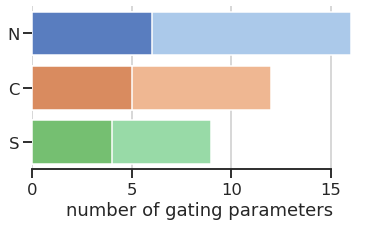

In [16]:
sns.set(style="ticks")
sns.set_context('talk')
sns.set_color_codes("pastel")

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="inact", y="model", hue="model", data=df,
            palette="pastel", dodge=False)
            #label="inact", color="b")

sns.set_color_codes("muted")
sns.barplot(x="act", y="model", hue="model", data=df,
            palette="muted", dodge=False)
            #label="act", color="r")

handles, labels = ax.get_legend_handles_labels()
order = []
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          ncol=2, loc="lower right", frameon=False)
ax.set(xlabel="number of gating parameters")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [17]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/param_num_compare.pdf')

### Compare original and full datasets

In [32]:
cv_nyg_reported_d = weighted_cv(df_nyg_reported_d, w_nyg_reported_d, sample_size=len(df_nyg_reported_d))
cv_nyg_reported_f = weighted_cv(df_nyg_reported_f, w_nyg_reported_f, sample_size=len(df_nyg_reported_f))

cv_nyg_reported = pd.concat([cv_nyg_reported_d, cv_nyg_reported_f])
model = ['N',]*len(cv_nyg_reported)
data = ['ORIGINAL',]*len(cv_nyg_reported)
frame = {'model': model, 'data': data, 'CV': cv_nyg_reported}
nyg_reported = pd.DataFrame(frame)

In [33]:
cv_nyg_d = weighted_cv(df_nyg_d, w_nyg_d, sample_size=len(df_nyg_d))
cv_nyg_f = weighted_cv(df_nyg_f, w_nyg_f, sample_size=len(df_nyg_f))

cv_nyg = pd.concat([cv_nyg_d, cv_nyg_f])
model = ['N',]*len(cv_nyg)
data = ['COMPLETE',]*len(cv_nyg)
frame = {'model': model, 'data': data, 'CV': cv_nyg}
nyg = pd.DataFrame(frame)

In [34]:
cv_cou_reported_d = weighted_cv(df_cou_reported_d, w_cou_reported_d, sample_size=len(df_cou_reported_d))
cv_cou_reported_f = weighted_cv(df_cou_reported_f, w_cou_reported_f, sample_size=len(df_cou_reported_f))

cv_cou_reported = pd.concat([cv_cou_reported_d, cv_cou_reported_f])
model = ['C',]*len(cv_cou_reported)
data = ['ORIGINAL',]*len(cv_cou_reported)
frame = {'model': model, 'data': data, 'CV': cv_cou_reported}
cou_reported = pd.DataFrame(frame)

In [35]:
cv_cou_d = weighted_cv(df_cou_d, w_cou_d, sample_size=len(df_cou_d))
cv_cou_f = weighted_cv(df_cou_f, w_cou_f, sample_size=len(df_cou_f))

cv_cou = pd.concat([cv_cou_d, cv_cou_f])
model = ['C',]*len(cv_cou)
data = ['COMPLETE',]*len(cv_cou)
frame = {'model': model, 'data': data, 'CV': cv_cou}
cou = pd.DataFrame(frame)

In [17]:
compare_reported_full = pd.concat([nyg_reported, nyg])#, cou_reported, cou])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

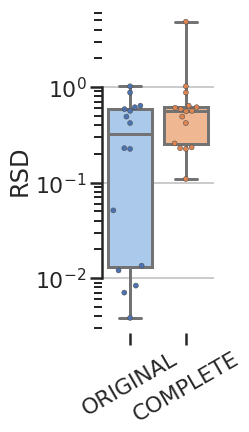

In [18]:
sns.set(style="ticks")
sns.set_context('poster')
sns.set_color_codes('pastel')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='data', y='CV', data=compare_reported_full,
            #hue='model',
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='data', y='CV', data=compare_reported_full,
              #hue='model',
              dodge=True, linewidth=0.5
            )

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = compare_reported_full['CV'].max() + 0.02, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.26", ha='center', va='bottom', color=col)

plt.xticks(rotation=30)

In [19]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/nyg_add_data.pdf')

In [106]:
diff = nyg.CV-nyg_reported.CV
ss.wilcoxon(diff)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)

In [111]:
df_reported = pd.concat([nyg_reported, cou_reported])

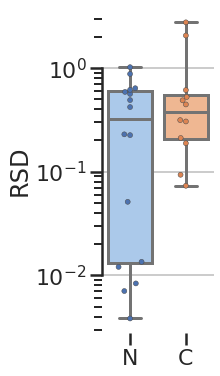

In [116]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='model', y='CV', data=df_reported,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='model', y='CV', data=df_reported,
              linewidth=0.5)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set(xlabel="")
ax.set_yscale('log')
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = df_reported['CV'].max() + 0.1, 0.1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.29", ha='center', va='bottom', color=col)

In [117]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/cv_original.pdf')

In [113]:
ss.mannwhitneyu(df_reported[df_reported.model=='N'].CV, df_reported[df_reported.model=='C'].CV)

MannwhitneyuResult(statistic=80.0, pvalue=0.2358950681666513)

In [94]:
nyg_pars_reported_d = df_nyg_reported_d.sample(n=100, weights=w_nyg_reported_d, replace=True)
nyg_pars_reported_d = nyg_pars_reported_d.set_index([pd.Index(range(100))])
nyg_pars_reported_f = df_nyg_reported_f.sample(n=100, weights=w_nyg_reported_f, replace=True)
nyg_pars_reported_f = nyg_pars_reported_f.set_index([pd.Index(range(100))])

nyg_pars_reported = pd.concat([nyg_pars_reported_d, nyg_pars_reported_f],axis=1).to_dict(orient='records')

In [95]:
N = 100
nyg_pars_d = df_nyg_d.sample(n=N, weights=w_nyg_d, replace=True)
nyg_pars_d = nyg_pars_d.set_index([pd.Index(range(N))])
nyg_pars_f = df_nyg_f.sample(n=N, weights=w_nyg_f, replace=True)
nyg_pars_f = nyg_pars_f.set_index([pd.Index(range(N))])
nyg_pars = pd.concat([nyg_pars_d, nyg_pars_f],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


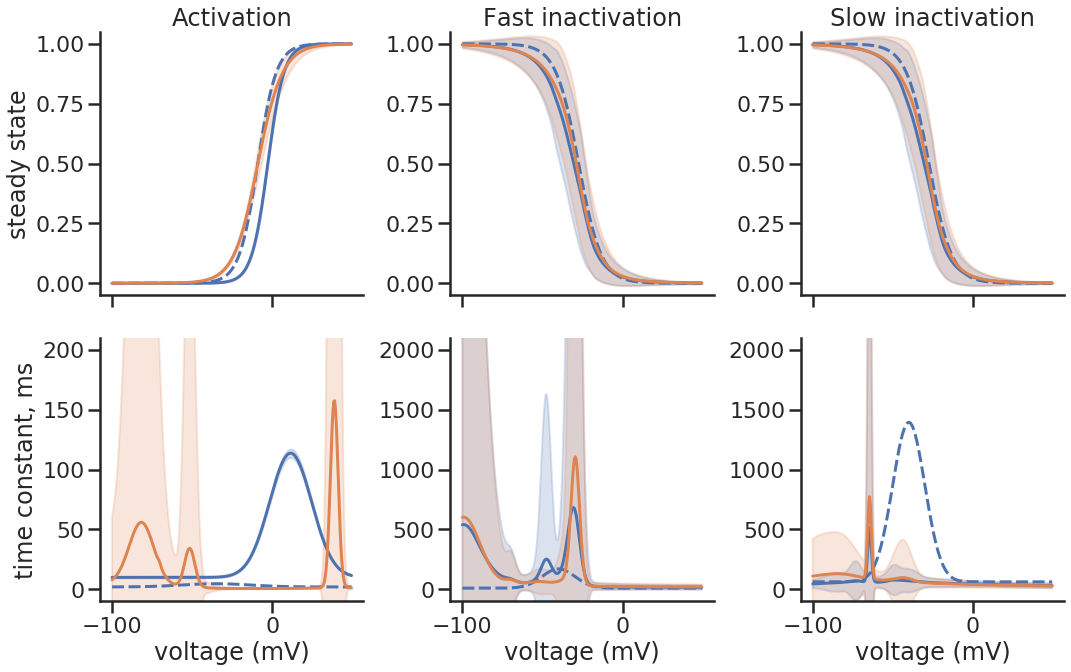

In [103]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

v = np.arange(-100, 50, 0.5)

nyg_vars = {'di': 'ical.d_inf',
            'fi1': 'ical.f_inf',
            'fi2': 'ical.f_inf',
            'dt': 'ical.tau_d',
            'ft1': 'ical.tau_f_1',
            'ft2': 'ical.tau_f_2'}

f, ax = plot_variables(v, [nyg_vars, nyg_vars], 
                       ['models/nygren_ical.mmt', 'models/nygren_ical_full.mmt'], 
                       [nyg_pars_reported, nyg_pars],
                       original=[True,False],
                       figshape=(3,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')
ax[0][2].set_title('Slow inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))
    
lim=200
ax[1][0].set_ylim((-0.05*lim, 1.05*lim))
lim=2000
ax[1][1].set_ylim((-0.05*lim, 1.05*lim))
lim=2000
ax[1][2].set_ylim((-0.05*lim, 1.05*lim))

ax[1][0].set_ylabel('time constant, ms')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [101]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/nyg_add_data_gates.pdf')

In [25]:
diff = cou.CV-cou_reported.CV
ss.wilcoxon(diff)

WilcoxonResult(statistic=37.0, pvalue=0.875329249147922)

## Standardised model

In [36]:
cv_sta = weighted_cv(df_sta, w_sta, sample_size=len(df_sta))

In [37]:
model = ['S',]*len(cv_sta)
frame = {'model': model, 'CV': cv_sta}
sta = pd.DataFrame(frame)

In [38]:
df = pd.concat([nyg, cou, sta])

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


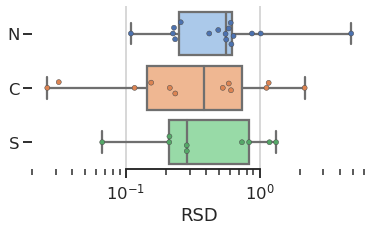

In [39]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', data=df,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', data=df,
              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="RSD")
ax.set_xscale('log')
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [40]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/compare_cv_full.pdf')

In [27]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=68.0, pvalue=0.4214644472052549)

In [28]:
ss.mannwhitneyu(df[df.model=='C'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=46.0, pvalue=0.29701617029952077)

In [29]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='C'].CV)

MannwhitneyuResult(statistic=80.0, pvalue=0.2358950681666513)

### Plot epsilon comparison

In [50]:
eps_nyg_d = h_nyg_d.get_weighted_distances()
eps_nyg_f = h_nyg_f.get_weighted_distances()

In [51]:
# Create virtual NYG epsilon dataset by summing
eps_nyg = np.array([])
eps_nyg = (np.array(eps_nyg_d.sample(n=100,axis=0,weights=eps_nyg_d.w,replace=True).distance) +
           np.array(eps_nyg_f.sample(n=100,axis=0,weights=eps_nyg_f.w,replace=True).distance))

In [52]:
eps_nyg = pd.DataFrame({'model': 'N', 'eps': eps_nyg, 'exp': 'all'})

In [53]:
eps_cou_d = h_cou_d.get_weighted_distances()
eps_cou_f = h_cou_f.get_weighted_distances()

In [54]:
# Create virtual COU epsilon dataset by summing
eps_cou = np.array([])
eps_cou = (np.array(eps_cou_d.sample(n=100,axis=0,weights=eps_cou_d.w,replace=True).distance) +
           np.array(eps_cou_f.sample(n=100,axis=0,weights=eps_cou_f.w,replace=True).distance))

In [55]:
eps_cou = pd.DataFrame({'model': 'C', 'eps': eps_cou, 'exp': 'all'})

In [58]:
eps_sta = h_sta.get_weighted_distances()

In [59]:
eps_sta = eps_sta.sample(n=100,axis=0,weights=eps_sta.w,replace=True).distance
eps_sta = pd.DataFrame({'model': 'S', 'eps': eps_sta, 'exp': 'all'})

In [60]:
eps = pd.concat([eps_nyg,eps_cou,eps_sta])

In [61]:
eps['normalised'] = (eps['eps']-eps['eps'].min())/(eps['eps'].max()-eps['eps'].min())

Text(0, 0.5, 'normalised residual')

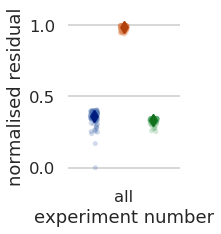

In [62]:
sns.set_context('talk')
sns.set_style('whitegrid')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(2, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='normalised', hue='model', data=eps, 
              dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="normalised", hue="model",
              data=eps,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

ax.get_legend().remove()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[3:], labels[3:], title="model",
#          handletextpad=0, columnspacing=1,
#          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')

In [63]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/eps_stripplot.pdf')

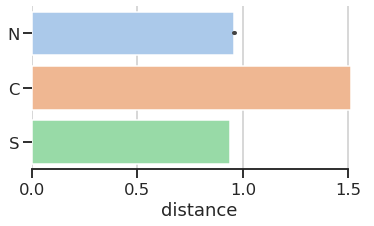

In [39]:
sns.set_context('talk')

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="eps", y="model", data=eps, palette='pastel')

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="distance")
sns.despine(trim=True, left=True)

In [81]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/eps_compare.pdf')

## Plot simulation outputs

In [13]:
from ionchannelABC.visualization import plot_sim_results

In [14]:
from experiments.ical_li import (li_act_and_tau,
                                 li_inact_1000,
                                 li_inact_kin_80,
                                 li_recov)

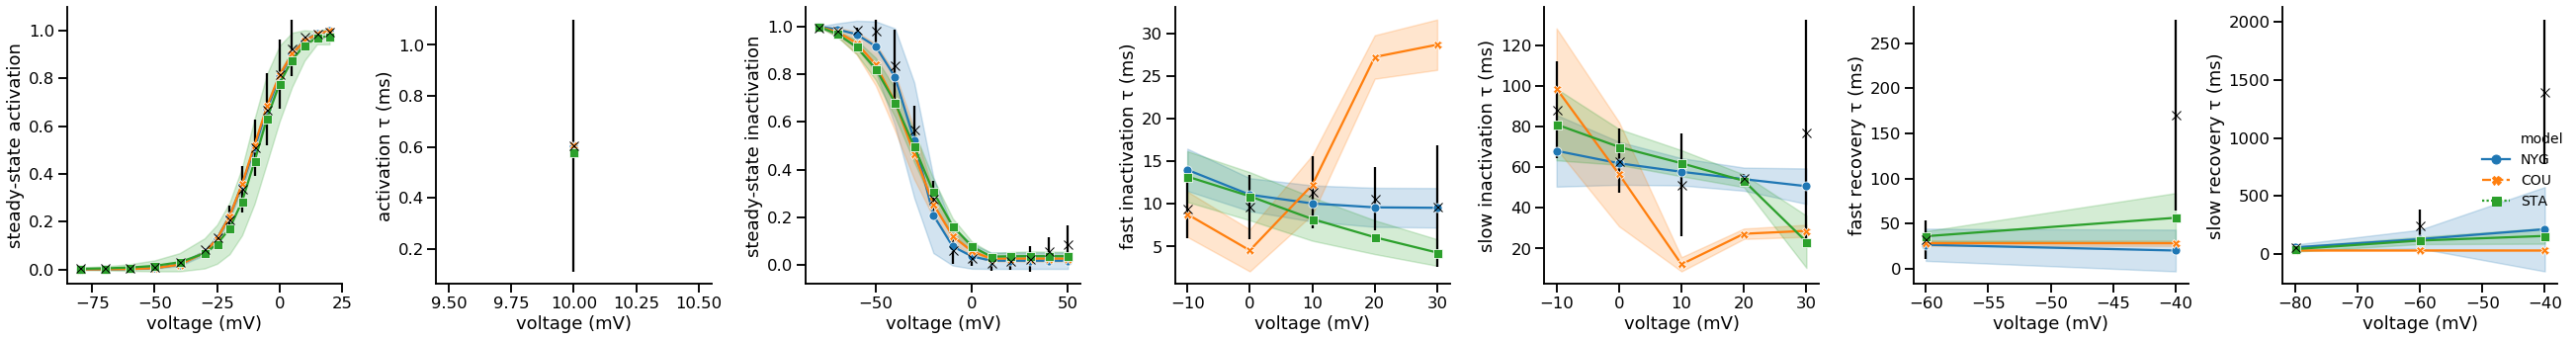

In [16]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(['models/nygren_ical.mmt',
                      'models/nygren_ical.mmt',
                      'models/courtemanche_ical.mmt',
                      'models/courtemanche_ical.mmt',
                      'models/standardised_ical.mmt'],
                     li_act_and_tau,
                     li_inact_1000,
                     li_inact_kin_80,
                     li_recov,
                     temp_match_model = 4,
                     masks=[[(0,1)]+[None,]*3,
                            [None]+[2,(3,4),(5,6)],
                            [(0,1)]+[None,]*3,
                            [None,]+[2,(3,4),(5,6)],
                            None],
                     df=[df_nyg_d,
                         df_nyg_f,
                         df_cou_d,
                         df_cou_f,
                         df_sta], 
                     w=[w_nyg_d,
                        w_nyg_f,
                        w_cou_d,
                        w_cou_f,
                        w_sta])

ylabels = ["steady-state activation", "activation τ (ms)", "steady-state inactivation",
           "fast inactivation τ (ms)", "slow inactivation τ (ms)", "fast recovery τ (ms)", 
           "slow recovery τ (ms)"]
#titles = ["Steady-state activation", "Activation time constant", "Steady-state inactivation",
#          "Inactivation time constant", "Inactivation time constant",
#          "Recovery time constant", "Recovery time constant"]
for ax in g.axes.flatten():
    ax.set_xlabel("voltage (mV)")
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title("")

plt.tight_layout()

In [17]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/compare_out.pdf')

### Compare SS and tau values

In [40]:
import myokit
nyg = 'models/nygren_ical_adj.mmt'
cou ='models/courtemanche_ical.mmt'
std = 'models/standardised_ical.mmt'

In [41]:
v = np.arange(-80, 50, 0.5)

In [42]:
nyg_vars = {'di': 'ical.d_inf',
            'fi1': 'ical.f_inf',
            'fi2': 'ical.f_inf',
            'dt': 'ical.tau_d',
            'ft1': 'ical.tau_f_1',
            'ft2': 'ical.tau_f_2'}

In [43]:
cou_vars = {'di': 'ical.d_inf',
            'fi1': 'ical.f_inf',
            'fi2': 'ical.f_inf',
            'dt': 'ical.tau_d',
            'ft1': 'ical.tau_f',
            'ft2': 'ical.tau_f'
             }

In [44]:
from ionchannelABC.visualization import plot_variables

In [23]:
nyg_pars_reported_d = df_nyg_reported_d.sample(n=100, weights=w_nyg_reported_d, replace=True)
nyg_pars_reported_d = nyg_pars_reported_d.set_index([pd.Index(range(100))])
nyg_pars_reported_f = df_nyg_reported_f.sample(n=100, weights=w_nyg_reported_f, replace=True)
nyg_pars_reported_f = nyg_pars_reported_f.set_index([pd.Index(range(100))])

nyg_pars_reported = pd.concat([nyg_pars_reported_d, nyg_pars_reported_f],axis=1).to_dict(orient='records')

In [24]:
cou_pars_reported_d = df_cou_reported_d.sample(n=100, weights=w_cou_reported_d, replace=True)
cou_pars_reported_d = cou_pars_reported_d.set_index([pd.Index(range(100))])
cou_pars_reported_f = df_cou_reported_f.sample(n=100, weights=w_cou_reported_f, replace=True)
cou_pars_reported_f = cou_pars_reported_f.set_index([pd.Index(range(100))])

cou_pars_reported = pd.concat([cou_pars_reported_d, cou_pars_reported_f],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


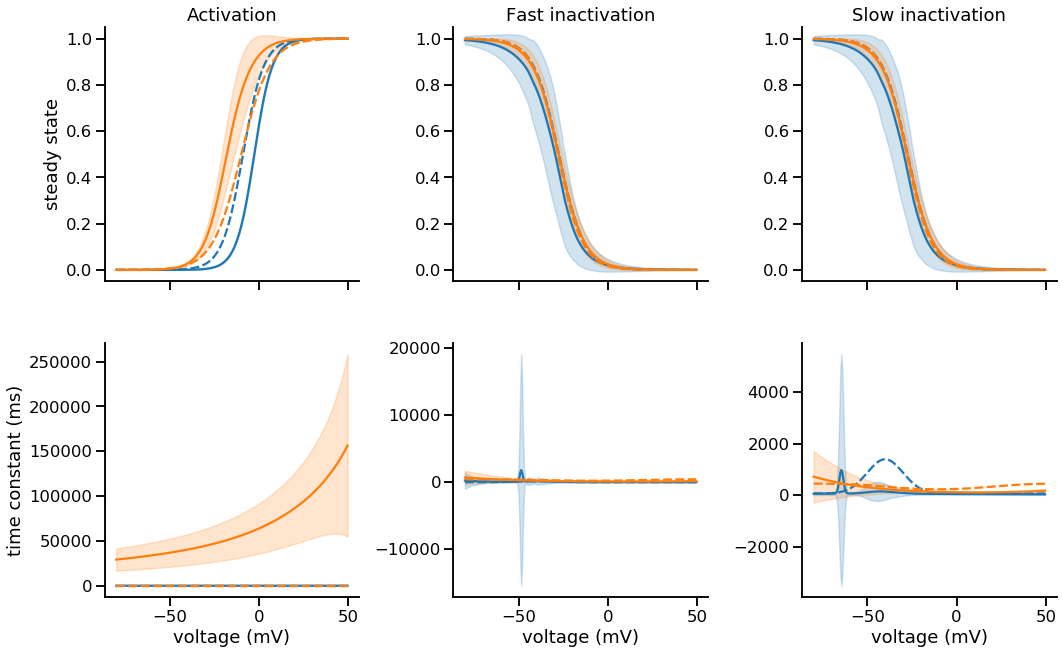

In [25]:
sns.set_context('talk')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars], 
                       [nyg, cou], 
                       [nyg_pars_reported, cou_pars_reported],
                       original=True,
                       figshape=(3,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')
ax[0][2].set_title('Slow inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
    
plt.tight_layout()

In [26]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/original_ss_tau.pdf')

In [45]:
std_vars = {'di': 'ical.d_ss',
            'fi1': 'ical.f_ss',
            'fi2': 'ical.f_ss',
            'dt': 'ical.tau_d',
            'ft1': 'ical.tau_f1',
            'ft2': 'ical.tau_f2'}

In [46]:
N = 100

nyg_pars_d = df_nyg_d.sample(n=N, weights=w_nyg_d, replace=True)
nyg_pars_d = nyg_pars_d.set_index([pd.Index(range(N))])
nyg_pars_f = df_nyg_f.sample(n=N, weights=w_nyg_f, replace=True)
nyg_pars_f = nyg_pars_f.set_index([pd.Index(range(N))])
nyg_pars = pd.concat([nyg_pars_d, nyg_pars_f],axis=1).to_dict(orient='records')

cou_pars_d = df_cou_d.sample(n=N, weights=w_cou_d, replace=True)
cou_pars_d = cou_pars_d.set_index([pd.Index(range(N))])
cou_pars_f = df_cou_f.sample(n=N, weights=w_cou_f, replace=True)
cou_pars_f = cou_pars_f.set_index([pd.Index(range(N))])
cou_pars = pd.concat([cou_pars_d,cou_pars_f],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

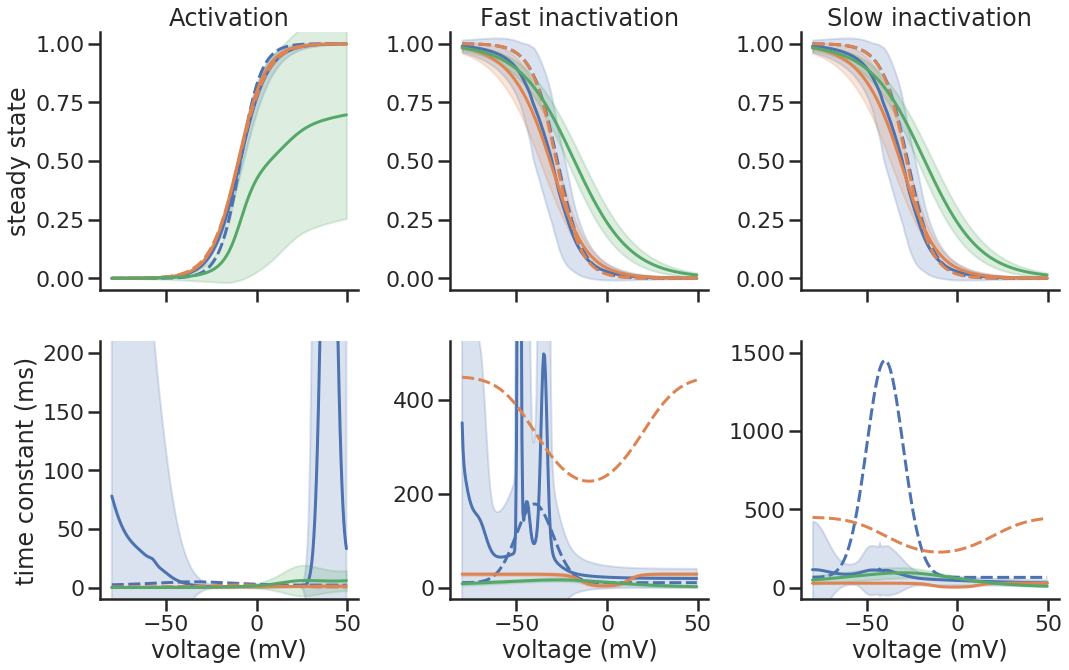

In [50]:
sns.set_context('poster')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars, std_vars], 
                       [nyg, cou, std], 
                       [nyg_pars, cou_pars, std_pars],
                       original=[True,True,False],
                       figshape=(3,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')
ax[0][2].set_title('Slow inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))
    
ax[1][0].set_ylim(-0.05*200, 200+0.05*200)
ax[1][1].set_ylim(-0.05*500, 500+0.05*500)
ax[1][2].set_ylim(-0.05*1500, 1500+0.05*1500)


ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [51]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/compare_gates.pdf')

### Compare final pulse after pulse train

In [52]:
import myokit

In [53]:
nsteps = 100
period = 1000
tstep = 200
vhold = -80
vstep = -10

pulsetrain = myokit.pacing.steptrain([vstep,]*nsteps,
                                     vhold,
                                     period-tstep,
                                     tstep)

In [54]:
# nygren_ina_full has had tau values adjusted for temperature to 310K
models = [myokit.load_model(modelfile) for modelfile in ['models/nygren_ical_adj.mmt',
                                                         'models/courtemanche_ical.mmt',
                                                         'models/standardised_ical.mmt']]
for m in models:
    pace = m.get('membrane.V')
    if pace.binding() != 'pace':
        if pace.is_state():
            pace.demote()
        pace.set_rhs(0)
        pace.set_binding('pace')

In [55]:
sims = [myokit.Simulation(m, pulsetrain) for m in models]

In [56]:
par_samples = [nyg_pars, cou_pars, std_pars]

In [57]:
import time

all_samples = pd.DataFrame({})
for i, s in enumerate(sims):
    s.reset()
    # store original
    if models[i].name() != 'STA':
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ical.g','engine.time','membrane.V'],
                        log_interval=0.5)
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ical.g']/max(datalog['ical.g']),
              'sample': 0,
              'model': models[i].name(),
              'type': 'original'}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)
    
    # re-calibrated
    for j, par_sample in enumerate(par_samples[i]):
        s.reset()
        for p, v in par_sample.items():
            name = p
            value = v
            if p.startswith("log"):
                name = p[4:]
                value = 10**v
            s.set_constant(name, value)
            
        # Log run time for comparisons
        t0 = time.time()
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ical.g','engine.time','membrane.V'],
                        log_interval=1)
        t1 = time.time()
        dt = t1-t0
        
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ical.g']/max(datalog['ical.g']),
              'sample': j,
              'model': models[i].name(),
              'type': 'recalibrated',
              'runtime': dt}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [58]:
recalibrated_df = all_samples[all_samples['type']=='recalibrated']

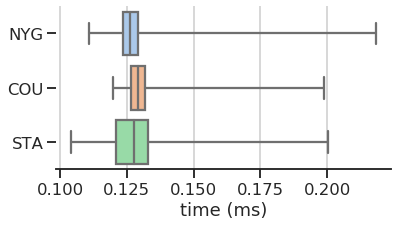

In [59]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='runtime', y='model', data=recalibrated_df,
            palette="pastel", whis="range")

# Add in points to show each observation
#sns.swarmplot(x='model', y='runtime', data=recalibrated_df,
#              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="time (ms)")
sns.despine(left=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = recalibrated_df['runtime'].max() + 0.01, 0.01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col)

In [60]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/runtime_compare.pdf')

In [73]:
ss.mannwhitneyu(recalibrated_df[recalibrated_df.model=='NYG'].runtime, 
                recalibrated_df[recalibrated_df.model=='COU'].runtime)

MannwhitneyuResult(statistic=165528000.0, pvalue=0.0)

In [65]:
all_samples_detail = all_samples[(all_samples['time']>=19) & (all_samples['time'] < 30)]

Text(0.5, 1.0, '')

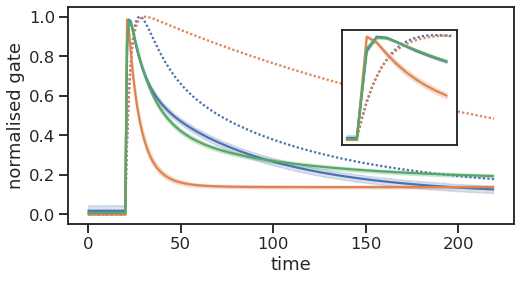

In [69]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(8,4))

g = sns.lineplot(x='time', y='gate', hue='model', style='type',
                 #kind='line', 
                 dashes = [(1,1),''],
                 data=all_samples, ax=ax,
                 legend=False)
                 #legend=False, height=5, aspect=1)


ax2 = plt.axes([.6, .4, .2, .4])
sns.lineplot(x='time',y='gate',hue='model',style='type',
             dashes=[(1,1),''],
             #data=all_samples_detail[all_samples_detail['type']=='original'], ax=ax2,
             data=all_samples_detail, ax=ax2,
             legend=False)
plt.setp(ax2, xticks=[], yticks=[])
ax2.set_xlabel('')
ax2.set_ylabel('')


#ax3 = plt.axes([.65, .25, .3, .15])
#sns.lineplot(x='time',y='gate',hue='model',
#             data=all_samples_detail[all_samples_detail['type']=='recalibrated'], ax=ax3,
#             legend=False)
#plt.setp(ax3, xticks=[], yticks=[])
#ax3.set_xlabel('')
#ax3.set_ylabel('')

#for a in g.axes.flatten():
ax.set_ylabel('normalised gate')
ax.set_title('')
#    a.axvline(x=19, linestyle='--', color='k', linewidth=2)
#    a.axvline(x=30, linestyle='--', color='k', linewidth=2)

In [70]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/trace_compare_out.pdf')

## Per-Experiment Comparison

In [16]:
N = 100

nyg_pars_d = df_nyg_d.sample(n=N, weights=w_nyg_d, replace=True)
nyg_pars_d = nyg_pars_d.set_index([pd.Index(range(N))])
nyg_pars_d = nyg_pars_d.to_dict(orient='records')

nyg_pars_f = df_nyg_f.sample(n=N, weights=w_nyg_f, replace=True)
nyg_pars_f = nyg_pars_f.set_index([pd.Index(range(N))])
nyg_pars_f = nyg_pars_f.to_dict(orient='records')
#nyg_pars = pd.concat([nyg_pars_d, nyg_pars_f],axis=1).to_dict(orient='records')

cou_pars_d = df_cou_d.sample(n=N, weights=w_cou_d, replace=True)
cou_pars_d = cou_pars_d.set_index([pd.Index(range(N))])
cou_pars_d = cou_pars_d.to_dict(orient='records')

cou_pars_f = df_cou_f.sample(n=N, weights=w_cou_f, replace=True)
cou_pars_f = cou_pars_f.set_index([pd.Index(range(N))])
cou_pars_f = cou_pars_f.to_dict(orient='records')

#cou_pars = pd.concat([cou_pars_d,cou_pars_f],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

In [17]:
from ionchannelABC.experiment import setup
from ionchannelABC.distance import IonChannelDistance

In [19]:
from experiments.ical_li import (li_act,
                                 li_act_tau,
                                 li_inact_1000,
                                 li_inact_kin_tauf_80,
                                 li_inact_kin_taus_80,
                                 li_recov_tauf,
                                 li_recov_taus)
experiments = [li_act,
               li_act_tau,
               li_inact_1000,
               li_inact_kin_tauf_80,
               li_inact_kin_taus_80,
               li_recov_tauf,
               li_recov_taus]
models = ['models/nygren_ical_adj.mmt',
          'models/courtemanche_ical.mmt',
          'models/standardised_ical.mmt']
pars = [[nyg_pars_d, nyg_pars_f], [cou_pars_d,cou_pars_f], std_pars]
names = ['N','C','S']

In [20]:
def experiment_dist(pars, modelfile, experiment):
    eps = []
    observ, model, sum_stats = setup(modelfile,
                                     experiment)
    obs = observ.to_dict()['y']
    obs = {str(k): v for k, v in obs.items()}
    dist = IonChannelDistance(exp_id=list(observ.exp_id),
                              variance=list(observ.variance),
                              delta=0.05)
    for sample in pars:
        eps.append(dist(sum_stats(model(sample)), obs, None))    
    return eps

In [21]:
df = pd.DataFrame({})
mask = [[0, 0, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1], None]
for j, exp in enumerate(experiments):
    df_ = pd.DataFrame({})
    for i, m in enumerate(models):
        if mask[i] is not None:
            eps = np.array(
                experiment_dist(pars[i][mask[i][j]],
                                m,
                                exp)
                )
        else:
            eps = np.array(
                experiment_dist(pars[i],
                                m,
                                exp)
                )
        df_ = df_.append(pd.DataFrame({'model': names[i],
                                       'exp': str(j),
                                       'eps': eps[~np.isinf(eps)]}))
    eps_max = df_['eps'].max()
    eps_min = df_['eps'].min()
    df_['eps'] = (df_['eps'] - eps_min)/(eps_max-eps_min)
    df = df.append(df_)

Text(0, 0.5, 'normalised residual')

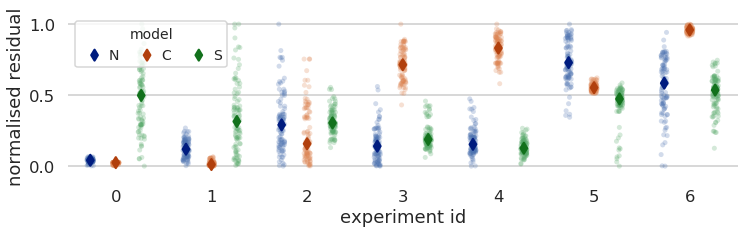

In [25]:
sns.set_context('talk')
sns.set_style('whitegrid')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(figsize=(12, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='eps', hue='model', data=df, 
              dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="eps", hue="model",
              data=df,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="model",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment id')
ax.set_ylabel('normalised residual')

In [24]:
fig.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ical/per-exp-dist.pdf')